In [1]:
import pandas as pd

In [2]:
df_tax = pd.read_json('../taxonomy/wish_newtax.json', lines=True)
df_tax = df_tax[df_tax.category_path.apply(len) > 0]

In [65]:
id2l1 = {}
id2l2 = {}
id2l3 = {}
id2l4 = {}
id2l5 = {}
id2path = {}

for i in df_tax.to_dict('records'):
    id2l1[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:1])
    id2l2[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:2])
    id2l3[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:3])
    id2l4[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:4])
    id2l5[int(i['id'])] = ' > '.join(i['category_path'].split(' > ')[:5])
    id2path[int(i['id'])] = i['category_path']

In [3]:
df_offshore_test = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Test.json', lines=True)
df_offshore_val = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Val.json', lines=True)
df_offshore_train = pd.read_json('../query_label/processed/Offshore_Labelled_Query_Classification_Train_01112023.json', lines=True)
df_appen_train = pd.read_json('../query_label/processed/Appen_Labelled_Query_Classification_Train_NoOverlapOffshore_01112023.json', lines=True)

In [8]:
df_offshore_test['split'] = 'test'
df_offshore_val['split'] = 'val'
df_offshore_train['split'] = 'train'
df_appen_train['split'] = 'train'

In [9]:
df_all = pd.concat([df_offshore_test, df_offshore_val, df_offshore_train, df_appen_train])

In [11]:
df_all_long = df_all[df_all['query'].apply(lambda x: x.count(" ") >= 2)]

In [12]:
len(df_all_long)

27172

In [13]:
df_all_long

,label_ordering,query,sample_method,gmv,cnt,query_classifications,query_classification_lists,query_classification_ids,lang,split
1,2,wooden box with lid,uniform,53.815742,221,Home & Garden > Home Storage & Organization > ...,[Home & Garden > Home Storage & Organization >...,"[2733, 2766, 2375]",en,test
5,6,make up brush holder,head,563.793213,1191,Home & Garden > Home Storage & Organization > ...,[Home & Garden > Home Storage & Organization >...,"[2724, 866, 1039]",en,test
6,7,babygirl necklace gold,uniform,293.565033,552,Jewelry & Accessories > Customized Jewelry > C...,[Jewelry & Accessories > Customized Jewelry > ...,"[4072, 4090, -1]",en,test
13,14,mini spy camera,head,5363.796387,5213,Security & Protection > Video Surveillance > S...,[Security & Protection > Video Surveillance > ...,"[4723, 495, 1538]",en,test
14,15,sport watches for men,head,4290.814941,4320,"Watches > Men's Watches > Sports Watches,nan,nan",[Watches > Men's Watches > Sports Watches],"[5976, -1, -1]",en,test
...,...,...,...,...,...,...,...,...,...,...
45607,99874,battery level indicator,uniform,114.710907,111,NaN,[Tools > Measurement & Analysis Instruments > ...,"[5580, 5566]",NaN,train
45608,99876,fuck it just get naked,head,1174.698608,1176,NaN,[no_match],[-1],NaN,train
45609,99877,lofers shoes men,head,1439.291138,2572,NaN,[Shoes > Men's Shoes > Loafers],[4745],NaN,train
45618,99968,relogio esportivo feminino,uniform,155.045456,190,NaN,[Watches > Men's Watches > Sports Watches],[5976],NaN,train


In [23]:
df_all_long_withclf = df_all_long[df_all_long.query_classification_ids.apply(lambda x: x[0] != -1)]

In [25]:
df_all_long_withclf['top_query_classification_id'] = df_all_long_withclf['query_classification_ids'].apply(lambda x: x[0])

/tmp/ipykernel_4488/3457504523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_long_withclf['top_query_classification_id'] = df_all_long_withclf['query_classification_ids'].apply(lambda x: x[0])


In [34]:
len(set(df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l1[x])))

27

In [30]:
len(set(df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l2[x])))

338

In [31]:
len(set(df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l3[x])))

1924

In [32]:
len(set(df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l4[x])))

3310

In [39]:
len(set(df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l5[x])))

3353

In [27]:
len(set(df_all_long_withclf.top_query_classification_id))

3353

<AxesSubplot: ylabel='top_query_classification_id'>

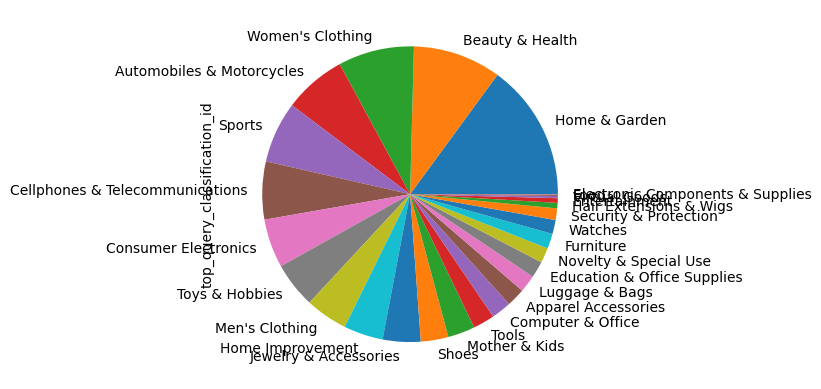

In [36]:
df_all_long_withclf.top_query_classification_id.apply(lambda x: id2l1[x]).value_counts().plot.pie()

In [41]:
df_all_long_withclf_train = df_all_long_withclf[df_all_long_withclf.split == 'train']

In [44]:
len(set(df_all_long_withclf_train.top_query_classification_id))

3189

In [55]:
df_all_long_withclf_train_sample = df_all_long_withclf_train.groupby('top_query_classification_id').sample(2, replace=True, random_state=42).drop_duplicates('query')

In [57]:
len(df_all_long_withclf_train_sample) / len(set(df_all_long_withclf_train_sample.top_query_classification_id.apply(lambda x: id2l1[x])))

178.0

<AxesSubplot: ylabel='top_query_classification_id'>

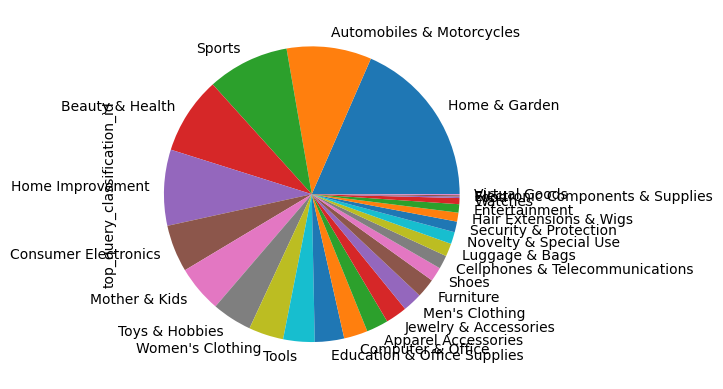

In [60]:
df_all_long_withclf_train_sample.top_query_classification_id.apply(lambda x: id2l1[x]).value_counts().plot.pie()

<AxesSubplot: ylabel='sample_method'>

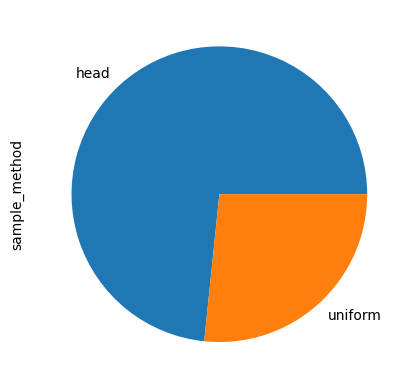

In [59]:
df_all_long_withclf_train_sample.sample_method.value_counts().plot.pie()

In [66]:
df_all_long_withclf_train_sample['top_query_classification_taxonomy'] = df_all_long_withclf_train_sample['top_query_classification_id'].apply(lambda x: id2path[x])

In [69]:
df_all_long_withclf_train_sample[['label_ordering', 'query', 'sample_method', 'top_query_classification_taxonomy']].sort_values(
    'label_ordering').to_csv('allstratified_sample_4806_query.csv', index=False)

In [72]:
len(df_all_long_withclf), len(df_all_long_withclf) - len(df_all_long_withclf_train_sample)

(26748, 21942)